importing:

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

loading dataset:

In [7]:
dataset = pd.read_csv('https://data.wprdc.org/datastore/dump/76fda9d0-69be-4dd5-8108-0de7907fc5a4', index_col = "REQUEST_ID")
dataset

,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
REQUEST_ID,,,,,,,,,,,,,,,,
203364.0,2017-12-15T14:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-7,-80.016716,40.454144,EXACT
200800.0,2017-11-29T09:54:00,Graffiti,Control Panel,1,Police - Zones 1-6,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,-79.969952,40.429243,APPROXIMATE
201310.0,2017-12-01T13:23:00,Litter,Call Center,1,DPW - Street Maintenance,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,-79.985859,40.459716,EXACT
200171.0,2017-11-22T14:54:00,Water Main Break,Call Center,1,Pittsburgh Water and Sewer Authority,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.034210,40.406969,EXACT
193043.0,2017-10-12T12:46:00,Guide Rail,Call Center,1,DPW - Construction Division,East Hills,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-19,-79.876582,40.451226,EXACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477503.0,2020-11-07T18:36:00,Tenant/Landlord Problems,Website,0,311,Homewood South,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,-79.888944,40.450762,APPROXIMATE
477504.0,2020-11-07T18:36:00,Police Department,Website,0,311,Homewood South,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,-79.889252,40.450779,APPROXIMATE
477505.0,2020-11-07T18:37:00,Litter,Website,0,DPW - Street Maintenance,Homewood South,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,-79.887391,40.451165,EXACT


overall count for which neighborhood has most 311 calls:

In [8]:
totalentries = len(dataset)

dataset['NEIGHBORHOOD'].value_counts().sort_values(ascending = False)

Brookline               18309
Carrick                 17352
Squirrel Hill South     15129
South Side Slopes       14723
South Side Flats        13790
                        ...  
East Carnegie             425
Northview Heights         420
Glen Hazel                290
Arlington Heights          87
Mount Oliver Borough       59
Name: NEIGHBORHOOD, Length: 91, dtype: int64

this is a lot of data, and not all of it may be relevant currently

in the data dictionary, a status of 0 means its a new entry

we can use a filter to only get entries with a status of 0, meaning it is new

In [9]:
filtered_dataset = dataset[dataset.STATUS == 0]
filtered_dataset

,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
REQUEST_ID,,,,,,,,,,,,,,,,
179176.0,2017-08-14T14:00:00,Neighborhood Issues,Control Panel,0,NaN,Middle Hill,6.0,5.0,4.200305e+10,3.0,5.0,2.0,2-1,-79.977726,40.446142,APPROXIMATE
182748.0,2017-08-28T12:49:00,Abandoned Vehicle (parked on street),Control Panel,0,Police - AVU,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.029944,40.486596,APPROXIMATE
184662.0,2017-09-05T13:49:00,Abandoned Vehicle (parked on street),Call Center,0,Police - AVU,Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.027634,40.470334,APPROXIMATE
185902.0,2017-09-11T13:49:00,Parks Trails,Call Center,0,DPW - Park Maintenance,NaN,6.0,1.0,4.200302e+10,NaN,1.0,NaN,1-4,-80.005966,40.438043,EXACT
167825.0,2017-07-06T15:26:00,Illegal Dumping,Control Panel,0,DOMI - Permits,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-20,-79.997763,40.452695,APPROXIMATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477503.0,2020-11-07T18:36:00,Tenant/Landlord Problems,Website,0,311,Homewood South,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,-79.888944,40.450762,APPROXIMATE
477504.0,2020-11-07T18:36:00,Police Department,Website,0,311,Homewood South,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,-79.889252,40.450779,APPROXIMATE
477505.0,2020-11-07T18:37:00,Litter,Website,0,DPW - Street Maintenance,Homewood South,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,-79.887391,40.451165,EXACT


and once again sorting by most entries

In [10]:
nbhcount = filtered_dataset['NEIGHBORHOOD'].value_counts().sort_values(ascending = False)
nbhcount

Brookline                    1203
Central Business District     968
Carrick                       826
Mount Washington              820
Beechview                     790
                             ... 
Ridgemont                      25
St. Clair                      23
Chartiers City                 20
Mount Oliver Borough           10
Arlington Heights               2
Name: NEIGHBORHOOD, Length: 91, dtype: int64

as a graph

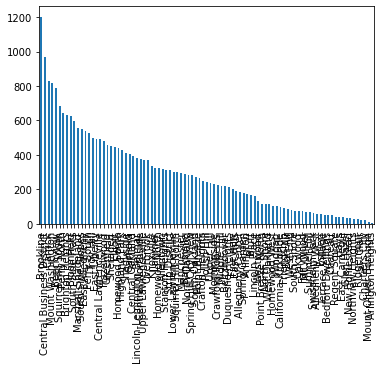

In [11]:
nbhcount.plot.bar()

graphs, but for most and least:

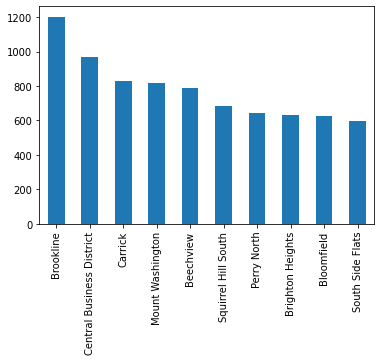

In [12]:
nbhcount.head(10).plot.bar()

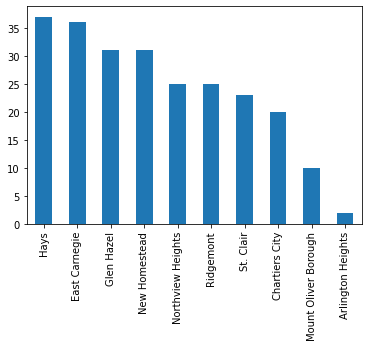

In [13]:
nbhcount.tail(10).plot.bar()